<a href="https://colab.research.google.com/github/harshithgowdakc/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
from google.colab import drive
drive.mount("/content.drive/")

Drive already mounted at /content.drive/; to attempt to forcibly remount, call drive.mount("/content.drive/", force_remount=True).


In [315]:
df = pd.read_excel('/content.drive/MyDrive/Almabetter/Unsupervised/Copy of default of credit card clients.xls')

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [317]:
df.shape

(30001, 25)

In [318]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [319]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [320]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [321]:
# remove the first row of column names
df.columns = df.iloc[0]

# remove the first row from the DataFrame
df = df[1:]

# reset the index of the DataFrame
df = df.reset_index(drop=True)

# display the modified DataFrame
print(df)

0         ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  \
0          1     20000   2         2        1  24     2     2    -1    -1   
1          2    120000   2         2        2  26    -1     2     0     0   
2          3     90000   2         2        2  34     0     0     0     0   
3          4     50000   2         2        1  37     0     0     0     0   
4          5     50000   1         2        1  57    -1     0    -1     0   
...      ...       ...  ..       ...      ...  ..   ...   ...   ...   ...   
29995  29996    220000   1         3        1  39     0     0     0     0   
29996  29997    150000   1         3        2  43    -1    -1    -1    -1   
29997  29998     30000   1         2        2  37     4     3     2    -1   
29998  29999     80000   1         3        1  41     1    -1     0     0   
29999  30000     50000   1         2        1  46     0     0     0     0   

0      ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT

In [322]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [323]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [324]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [325]:
df.duplicated().sum()

0

In [326]:
df.loc[df.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [327]:
df['LIMIT_BAL'].nunique()

81

In [328]:
df['LIMIT_BAL'].describe()

count     30000
unique       81
top       50000
freq       3365
Name: LIMIT_BAL, dtype: int64

In [329]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [330]:
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype(int)

In [331]:
df['LIMIT_BAL'].dtypes

dtype('int64')

<Axes: xlabel='LIMIT_BAL'>

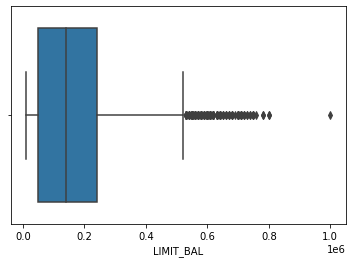

In [332]:
sns.boxplot(x = df['LIMIT_BAL'])

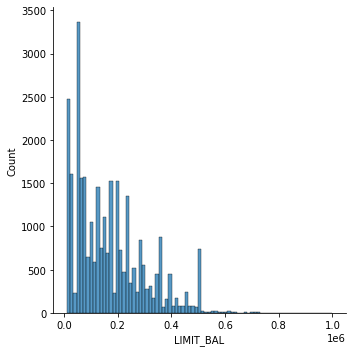

In [333]:
sns.displot(df['LIMIT_BAL'])

In [334]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [335]:
df['ID'].nunique()

30000

In [336]:
df.drop(columns= ['ID'], inplace = True)

In [337]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [338]:
df['SEX'].nunique()

2

In [339]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

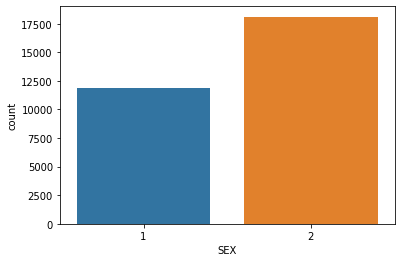

In [340]:
sns.countplot(x = df['SEX'])

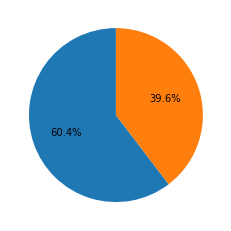

In [341]:
plt.pie(df['SEX'].value_counts(), autopct='%1.1f%%', startangle=90)
plt.show()

In [342]:
df['EDUCATION'].nunique()

7

In [343]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [344]:
df['EDUCATION'].dtypes

dtype('O')

<Axes: xlabel='EDUCATION', ylabel='count'>

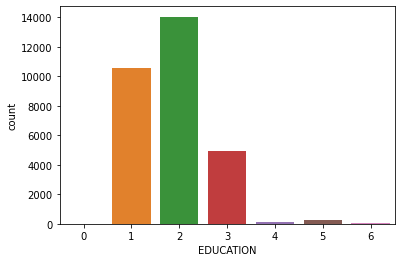

In [345]:
sns.countplot(x='EDUCATION', data=df)

<ipython-input-346-91b67aa37fcb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df['EDUCATION'].value_counts())


<Axes: ylabel='Density'>

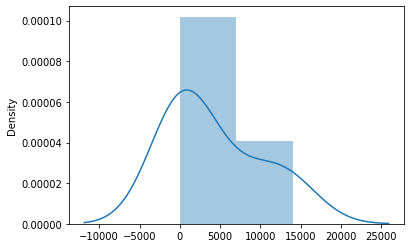

In [346]:
sns.distplot(x =df['EDUCATION'].value_counts())

In [347]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [348]:
df['MARRIAGE'].nunique()

4

In [349]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

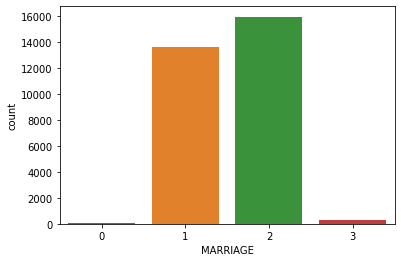

In [350]:
sns.countplot(x ='MARRIAGE', data = df)

In [351]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [352]:
df['AGE'].nunique()

56

In [353]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [354]:
df['AGE'] = df['AGE'].astype(int)

In [355]:
df['AGE'].dtypes

dtype('int64')

In [356]:
z = 1

In [357]:
# Define the bin ranges and labels
bin_edges = [0, 30, 50, 100]
bin_labels = ["Younger", "Middle", "Older"]

# Bin the AGE column using pd.cut()
df["AGE_bins"] = pd.cut(df["AGE"], bins=bin_edges, labels=bin_labels)

# View the counts of each bin
print(df["AGE_bins"].value_counts())

Middle     16718
Younger    11013
Older       2269
Name: AGE_bins, dtype: int64


<Axes: xlabel='AGE_bins', ylabel='count'>

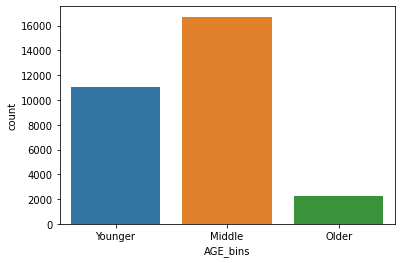

In [358]:
sns.countplot(x=df['AGE_bins'])

In [359]:
pd.options.display.max_rows= None
pd.options.display.max_columns= None

In [360]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [361]:
df['PAY_0'].nunique()

11

In [362]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [363]:
df['PAY_2'].nunique()

11

In [364]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [365]:
df['PAY_3'].nunique()

11

In [366]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [367]:
df['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [368]:
df['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [369]:
df['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [370]:
df['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [371]:
df['customer1'] = df['BILL_AMT1'] - df['PAY_AMT1']

In [372]:
df['customer1'] = df['customer1'].astype(int)

In [373]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_bins,customer1
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,Younger,3913
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,Younger,2682


In [374]:
df['customer2'] = df['BILL_AMT2'] - df['PAY_AMT2']

In [375]:
df['customer2'] = df['customer2'].astype(int)

In [376]:
df['customer3'] = df['BILL_AMT3'] - df['PAY_AMT3']

In [377]:
df['customer3'] = df['customer3'].astype(int)

In [378]:
df['customer4'] = df['BILL_AMT4'] - df['PAY_AMT4']

In [379]:
df['customer4'] = df['customer4'].astype(int)

In [380]:
df['customer5'] = df['BILL_AMT5'] - df['PAY_AMT5']

In [381]:
df['customer5'] = df['customer5'].astype(int)

In [382]:
df['customer6'] = df['BILL_AMT6'] - df['PAY_AMT6']

In [383]:
df['customer6'] = df['customer6'].astype(int)

In [384]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,AGE_bins,customer1,customer2,customer3,customer4,customer5,customer6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,Younger,3913,2413,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,Younger,2682,725,1682,2272,3455,1261


In [385]:
df['default payment next month'].nunique()

2

In [386]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

<Axes: xlabel='default payment next month', ylabel='count'>

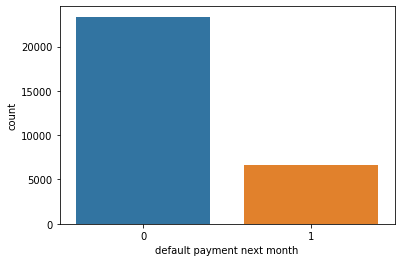

In [387]:
sns.countplot(x = df['default payment next month'])

In [388]:
df['customer1'].describe()

count     30000.000000
mean      45559.750400
std       73173.789447
min     -733744.000000
25%         745.000000
50%       18550.500000
75%       62241.500000
max      913727.000000
Name: customer1, dtype: float64

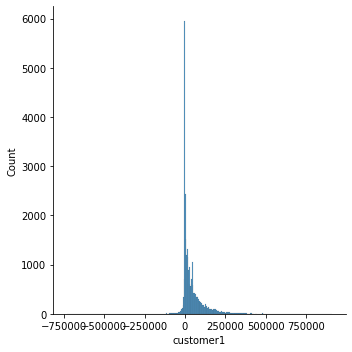

In [389]:
sns.displot(df['customer1'])

<Axes: xlabel='customer1'>

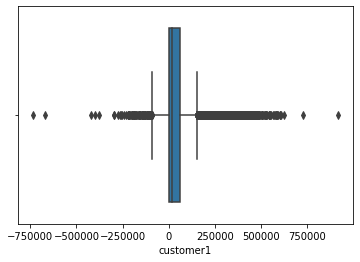

In [390]:
sns.boxplot(x = df['customer1'])

In [391]:
df['customer2'].describe().round()

count      30000.0
mean       43258.0
std        72566.0
min     -1702347.0
25%          330.0
50%        18102.0
75%        59078.0
max       933208.0
Name: customer2, dtype: float64

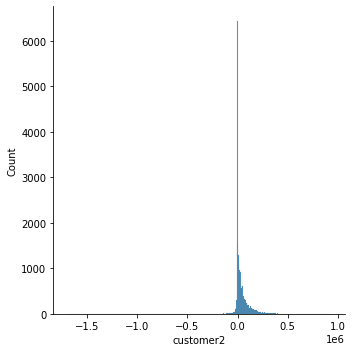

In [392]:
sns.displot(df['customer2'])

<Axes: xlabel='customer2'>

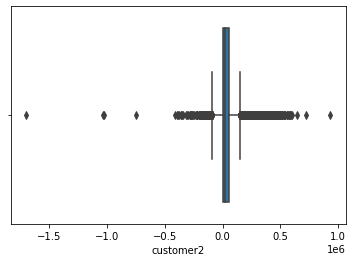

In [393]:
sns.boxplot(x = df['customer2'])

In [394]:
df['customer3'].describe().round()

count      30000.0
mean       41787.0
std        69295.0
min      -854641.0
25%          263.0
50%        17769.0
75%        56294.0
max      1542258.0
Name: customer3, dtype: float64

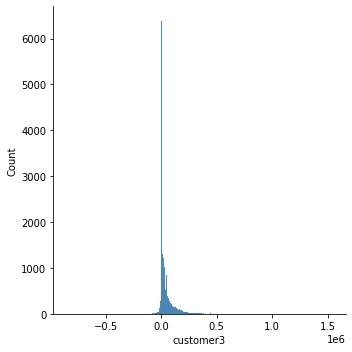

In [395]:
sns.displot(df['customer3'])

<Axes: xlabel='customer3'>

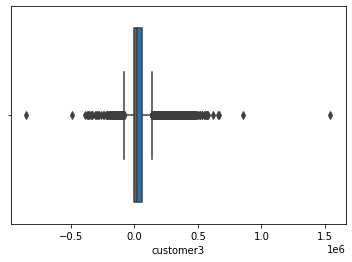

In [396]:
sns.boxplot(x = df['customer3'])

In [397]:
df['customer4'].describe().round()

count     30000.0
mean      38437.0
std       64201.0
min     -667000.0
25%         230.0
50%       16970.0
75%       50260.0
max      841586.0
Name: customer4, dtype: float64

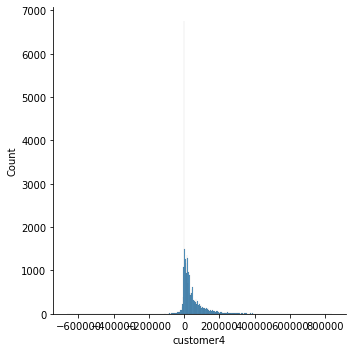

In [398]:
sns.displot(df['customer4'])

<Axes: xlabel='customer4'>

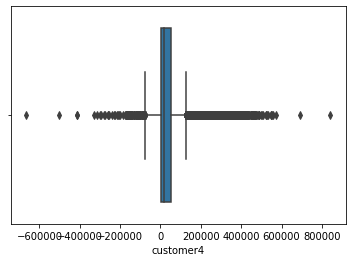

In [399]:
sns.boxplot(x = df['customer4'])

In [400]:
df['customer5'].describe().round()

count     30000.0
mean      35512.0
std       60553.0
min     -414380.0
25%           0.0
50%       15538.0
75%       46962.0
max      877171.0
Name: customer5, dtype: float64

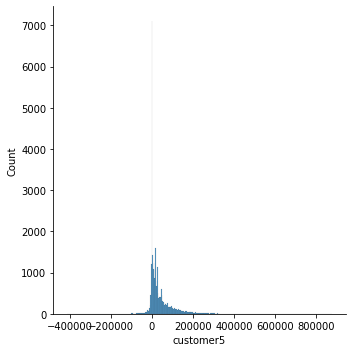

In [401]:
sns.displot(df['customer5'])

<Axes: xlabel='customer5'>

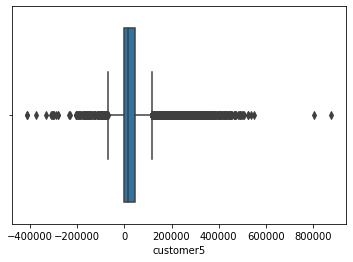

In [402]:
sns.boxplot(x = df['customer5'])

In [403]:
df['customer6'].describe().round()

count     30000.0
mean      33656.0
std       60151.0
min     -684896.0
25%           0.0
50%       13926.0
75%       46067.0
max      911408.0
Name: customer6, dtype: float64

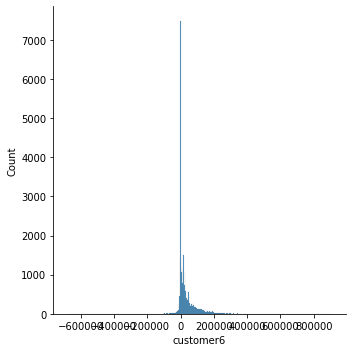

In [404]:
sns.displot(df['customer6'])

<Axes: xlabel='customer6'>

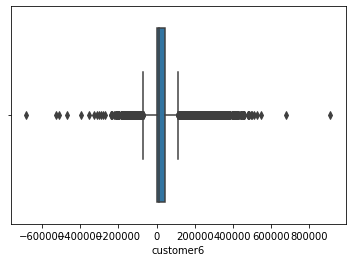

In [405]:
sns.boxplot(x = df['customer6'])

In [406]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,AGE_bins,customer1,customer2,customer3,customer4,customer5,customer6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,Younger,3913,2413,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,Younger,2682,725,1682,2272,3455,1261


In [407]:
df[['PAY_2','BILL_AMT2','PAY_AMT2','customer2','default payment next month']].head()

,PAY_2,BILL_AMT2,PAY_AMT2,customer2,default payment next month
0,2,3102,689,2413,1
1,2,1725,1000,725,1
2,0,14027,1500,12527,0
3,0,48233,2019,46214,0
4,0,5670,36681,-31011,0


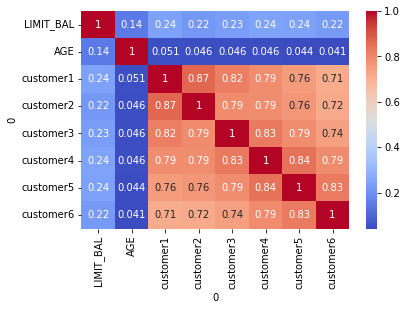

In [408]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [409]:
dummies = pd.get_dummies(df['AGE_bins'], prefix = 'AGE_bins')
dummies.drop(columns =[dummies.columns[0]], inplace = True)
df = pd.concat([df,dummies], axis =1)

<Axes: xlabel='default payment next month', ylabel='customer2'>

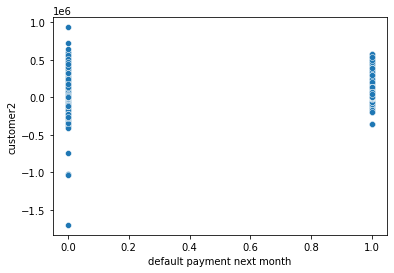

In [410]:
sns.scatterplot(x = df['default payment next month'],y = df['customer2'])

<Axes: xlabel='default payment next month', ylabel='customer1'>

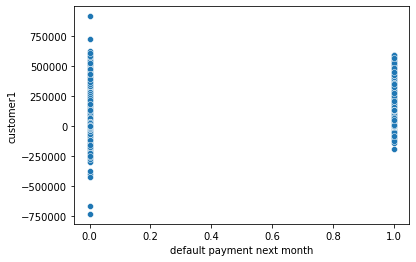

In [411]:
sns.scatterplot(x = df['default payment next month'],y = df['customer1'])

<Axes: xlabel='default payment next month', ylabel='customer3'>

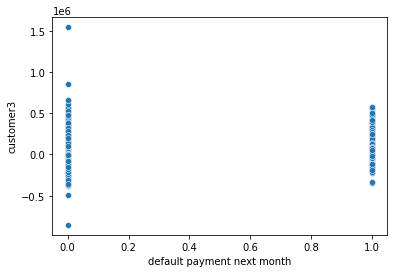

In [412]:
sns.scatterplot(x = df['default payment next month'],y = df['customer3'])

<Axes: xlabel='default payment next month', ylabel='customer4'>

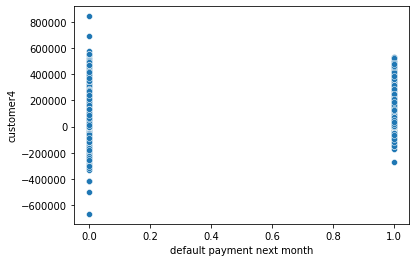

In [413]:
sns.scatterplot(x = df['default payment next month'],y = df['customer4'])

<Axes: xlabel='default payment next month', ylabel='customer5'>

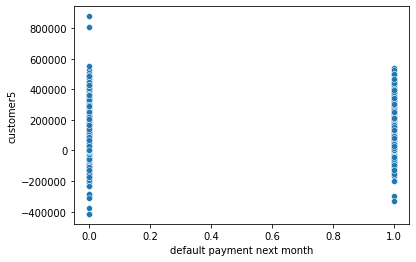

In [414]:
sns.scatterplot(x = df['default payment next month'],y = df['customer5'])

<Axes: xlabel='default payment next month', ylabel='customer6'>

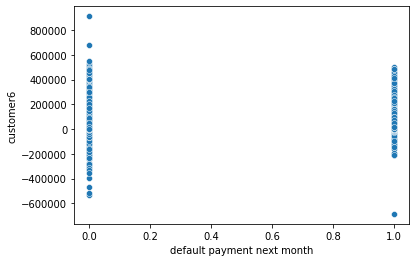

In [415]:
sns.scatterplot(x = df['default payment next month'],y = df['customer6'])

In [416]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,default payment next month,AGE_bins,customer1,customer2,customer3,customer4,customer5,customer6,AGE_bins_Middle,AGE_bins_Older
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,Younger,3913,2413,689,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1,Younger,2682,725,1682,2272,3455,1261,0,0


In [417]:
df['AGE_bins_Middle'].value_counts()

1    16718
0    13282
Name: AGE_bins_Middle, dtype: int64

<Axes: xlabel='AGE_bins', ylabel='count'>

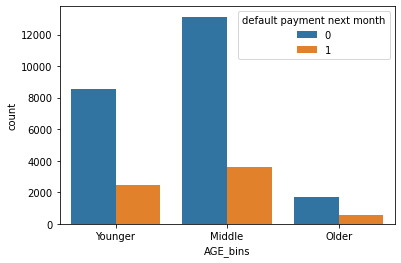

In [418]:
sns.countplot(x ='AGE_bins', hue = df['default payment next month'], data = df)

In [419]:
df['customer1'].describe()

count     30000.000000
mean      45559.750400
std       73173.789447
min     -733744.000000
25%         745.000000
50%       18550.500000
75%       62241.500000
max      913727.000000
Name: customer1, dtype: float64

In [420]:
df.shape

(30000, 33)

In [421]:
df['customer1'].nsmallest(8)

28716   -733744
12330   -670580
28003   -422237
8500    -398516
23003   -380039
3220    -298887
2687    -296278
25431   -273955
Name: customer1, dtype: int64

In [422]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,default payment next month,AGE_bins,customer1,customer2,customer3,customer4,customer5,customer6,AGE_bins_Middle,AGE_bins_Older
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,Younger,3913,2413,689,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1,Younger,2682,725,1682,2272,3455,1261,0,0


In [423]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

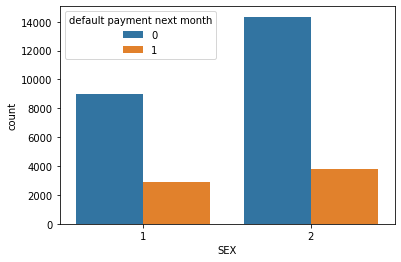

In [424]:
sns.countplot(x ='SEX', hue=df['default payment next month'], data= df)

<Axes: xlabel='MARRIAGE', ylabel='count'>

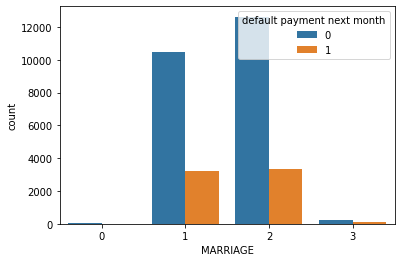

In [425]:
sns.countplot(x ='MARRIAGE', hue=df['default payment next month'], data= df)

In [426]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

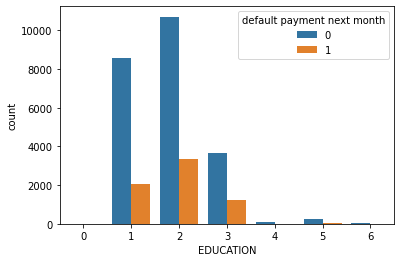

In [427]:
sns.countplot(x ='EDUCATION', hue=df['default payment next month'], data= df)

<Axes: xlabel='LIMIT_BAL', ylabel='default payment next month'>

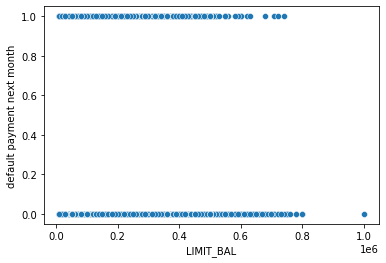

In [428]:
sns.scatterplot(x = df['LIMIT_BAL'], y = df['default payment next month'])

In [429]:
df['LIMIT_BAL'].nunique()

81

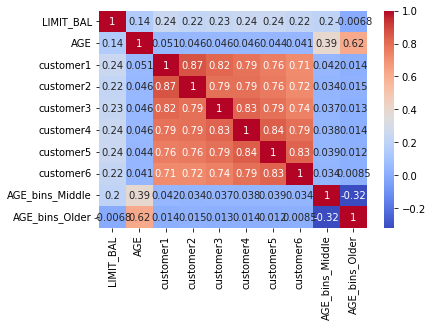

In [430]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [431]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1


Delete after this

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  object  
 2   EDUCATION                   30000 non-null  object  
 3   MARRIAGE                    30000 non-null  object  
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  object  
 6   PAY_2                       30000 non-null  object  
 7   PAY_3                       30000 non-null  object  
 8   PAY_4                       30000 non-null  object  
 9   PAY_5                       30000 non-null  object  
 10  PAY_6                       30000 non-null  object  
 11  BILL_AMT1                   30000 non-null  object  
 12  BILL_AMT2                   30000 non-null  object  
 13  BILL_AMT3       

Feature Selection

In [433]:
999 = agdsg

SyntaxError: ignored

In [434]:
# create dummy variables for all categorical columns except one
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE','default payment next month', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   LIMIT_BAL                     30000 non-null  int64   
 1   AGE                           30000 non-null  int64   
 2   BILL_AMT1                     30000 non-null  object  
 3   BILL_AMT2                     30000 non-null  object  
 4   BILL_AMT3                     30000 non-null  object  
 5   BILL_AMT4                     30000 non-null  object  
 6   BILL_AMT5                     30000 non-null  object  
 7   BILL_AMT6                     30000 non-null  object  
 8   PAY_AMT1                      30000 non-null  object  
 9   PAY_AMT2                      30000 non-null  object  
 10  PAY_AMT3                      30000 non-null  object  
 11  PAY_AMT4                      30000 non-null  object  
 12  PAY_AMT5                      30000 non-null  

In [436]:
X = df.iloc[:,15:92].values
X = np.delete(X, 33, axis=1)
y = df.iloc[:,33].values

In [440]:
X

array([[  3913,   2413,    689, ...,      0,      0,      0],
       [  2682,    725,   1682, ...,      0,      0,      0],
       [ 27721,  12527,  12559, ...,      0,      0,      0],
       ...,
       [  3565,   3356, -19242, ...,      0,      0,      0],
       [-87545,  74970,  75126, ...,      0,      0,      0],
       [ 45851,  47105,  48334, ...,      0,      0,      0]])

In [441]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 3)
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(X,y, test_size = 0.2, random_state= 3)
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X,y, test_size = 0.2, random_state= 3)

In [437]:
X.shape

(30000, 76)

In [438]:
y.shape

(30000,)

In [442]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [443]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)

In [444]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)

In [445]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

In [ ]:
plt.figure(figsize=(25,10))
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [447]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(24000,)


In [448]:
import numpy as np

unique_labels, label_counts = np.unique(y_train, return_counts=True)
print(unique_labels, label_counts)

[0 1] [18616  5384]


In [449]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [451]:
y_predict = model.predict(X_test)
for_raw_data = accuracy_score(y_predict,y_test)

In [452]:
for_raw_data

0.5543333333333333

In [453]:
model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)

LogisticRegression()

In [454]:
y_predict = model.predict(X_test_pca)
for_pca = accuracy_score(y_predict,y_test_pca)

In [456]:
for_pca

0.5543333333333333

In [457]:
from sklearn.ensemble import RandomForestClassifier

In [458]:
rf = RandomForestClassifier()
# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

In [459]:
from sklearn.model_selection import GridSearchCV

In [460]:
# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the random forest classifier on the training set using the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

# Evaluate the performance of the classifier on the test set
test_accuracy = np.mean(best_rf.predict(X_test) == y_test)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 1.0


In [461]:
# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_pca, y_train_pca)

# Train the random forest classifier on the training set using the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train_pca, y_train_pca)

# Evaluate the performance of the classifier on the test set
test_accuracy = np.mean(best_rf.predict(X_test_pca) == y_test_pca)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 1.0


In [463]:
import xgboost as xgb

In [464]:
# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid to search over
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [10, 50, 100],
              'gamma': [0, 0.1, 1]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the XGBoost classifier on the training set using the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train, y_train)

# Evaluate the performance of the classifier on the test set
test_accuracy = np.mean(best_xgb_model.predict(X_test) == y_test)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 1.0
